## Тестовое задание на позицию Junior Analyst

### 1. Вопросы:

1) Как хорошо Вы владеете Python? Оцените свой уровень по шкале от 0 до 10, где 0 - совсем не знаю, 10 - владею в совершенстве. Объясните, почему Вы выбрали такой балл.

Я оцениваю свои знания Python на 6,5 из 10.

Вот объяснение, почему я выбрала такой балл:

Я хорошо владею основным синтаксисом Python и стандартными структурами данных, такими как списки, словари, множества и кортежи.
Я знакома с использованием библиотек Python (например, Pandas, Plotly), которые используются для анализа и визуализации данных. У меня есть базовые навыки работы с данными, включая их чтение, очистку и предварительную обработку. 

Таким образом, я оцениваю свой уровень владения Python как уверенный, но все еще развивающийся, с целью дальнейшего улучшения и углубления знаний.

2) Насколько хорошо Вы знакомы с Google Sheets? Оцените свой уровень по шкале от 0 до 10, где 0 - совсем не знаю, 10 - владею в совершенстве. Объясните, почему Вы выбрали такой балл.

Я оцениваю свои знания Google Sheets на 7 из 10.

Основным инструментом, которым я пользовалась в работе, был MS Excel, что позволило мне приобрести глубокие знания в области работы с электронными таблицами. Поскольку Google Sheets предоставляет аналогичный набор инструментов, я легко могу применить свой опыт и навыки к этой платформе. Уверенно использую основные функции и формулы, организую данные и успешно справляюсь с задачами. Более того, я готова освоить дополнительные навыки работы с Google Sheets в кратчайшие сроки, чтобы эффективно выполнять поставленные задачи.

### 2. Задачи на логику:

### 3. Техническое задание

In [5]:
import pandas as pd

In [111]:
data = pd.read_excel('data.xlsx')
data.head(10)

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-07-15 00:00:00
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-13 00:00:00
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08 00:00:00
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,2021-06-23 00:00:00


In [78]:
data['receiving_date'] = pd.to_datetime(data['receiving_date'] , format='%Y-%m-%d', errors='coerce')

july_2021 = data[(data['status']== 'ОПЛАЧЕНО') & (data['receiving_date'].dt.year == 2021) 
                 & (data['receiving_date'].dt.month == 7)]

sum_revenue = round(sum(july_2021['sum']), 2)

print(f'Общая выручка за июль 2021 по тем сделкам, приход денежных средств которых не просрочен, составила {sum_revenue}.')

Общая выручка за июль 2021 по тем сделкам, приход денежных средств которых не просрочен, составила 757830.74


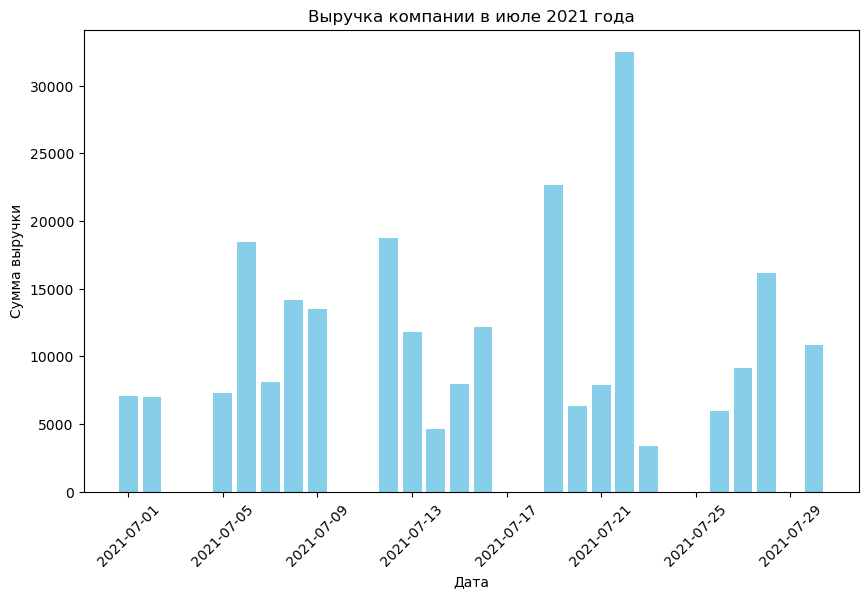

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(july_2021['receiving_date'], july_2021['sum'], color='skyblue')

plt.xlabel('Дата')
plt.ylabel('Сумма выручки')
plt.title('Выручка компании в июле 2021 года')

plt.xticks(rotation=45)

plt.show()

In [82]:
sept_2021 = data[(data['receiving_date'].dt.year == 2021) & (data['receiving_date'].dt.month == 9 )]
first_manager = sept_2021[['sale','sum']].sort_values(by = 'sum', ascending=False).iloc[0]

print(f'Больше всего денежных средств в сентябре 2021 привлёк {first_manager["sale"]}.')

Больше всего денежных средств в сентябре 2021 привлёк Иванов.


In [87]:
oktober_2021 = data[(data['receiving_date'].dt.year == 2021) & (data['receiving_date'].dt.month == 10 )]
data_count = data['new/current'].value_counts()
predominant_type = data_count.idxmax()
print(f'Преобладающий тип сделок в октябре 2021 года: {predominant_type}')

Преобладающий тип сделок в октябре 2021 года: текущая


In [96]:
may_deals = data[data['status'] == 'Май 2021']
june_originals = data[(data['receiving_date'].dt.year == 2021) & (data['receiving_date'].dt.month == 6 ) 
                      & (may_deals['document'] == 'оригинал')]
count_june_originals = june_originals.shape[0]
print(f'Количество оригиналов договоров по майским сделкам, полученных в июне 2021 года: {count_june_originals}')

Количество оригиналов договоров по майским сделкам, полученных в июне 2021 года: 0


In [103]:
remainder = data[(data['receiving_date'] > '2021-06-30') & 
                 ((data['status'] != 'ПРОСРОЧЕНО') | 
                  ((data['new/current'] == 'новая') & (data['status'] == 'ОПЛАЧЕНО'))) &
                 (data['document'] == 'оригинал')].copy()

def calculate_bonus(row):
    if row['new/current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО':
        return row['sum'] * 0.07
    elif row['new/current'] == 'текущая' and row['status'] != 'ПРОСРОЧЕНО':
        if row['sum'] > 10000:
            return row['sum'] * 0.05
        else:
            return row['sum'] * 0.03
    return 0


remainder['bonus'] = round(remainder.apply(calculate_bonus, axis=1), 2)

manager_remainder = remainder.groupby('sale')['bonus'].sum()

manager_remainder_df = manager_remainder.reset_index()


print("Остаток каждого менеджера на 01.07.2021:")
print(manager_remainder_df)

Остаток каждого менеджера на 01.07.2021:
         sale     bonus
0     Андреев  26175.97
1    Васильев   6934.62
2      Иванов  22254.25
3   Кузнецова  16108.76
4    Михайлов    607.07
5     Петрова  27753.62
6   Селиванов   7102.47
7     Смирнов  30073.13
8     Соколов   3730.70
9  Филимонова  10830.51
